In [3]:
import lens
import point
from new_world import World

# Let's define some attribute for constructing the world first
name = "traffic_scene"  # world name
units = "metrics"  # world units
video_file = "../amber_videos/traffic-scene-shorter.mp4"  # example video file
lens_attrs = {"fov": 120, "cam_origin": (0, 0, 0), "skew_factor": 0}
point_attrs = {"p_id": "p1", "cam_id": "cam1", "x": 0, "y": 0, "z": 0, "time": None, "type": "pos"}
camera_attrs = {"ratio": 0.5}
fps = 30

# 1. define a world
traffic_world = World()  # TODO: name, units?

# 2. construct a camera
fov, res, cam_origin, skew_factor = (
    lens_attrs["fov"],
    [1280, 720],
    lens_attrs["cam_origin"],
    lens_attrs["skew_factor"],
)
cam_lens = lens.PinholeLens(res, cam_origin, fov, skew_factor)

pt_id, cam_id, x, y, z, time, pt_type = (
    point_attrs["p_id"],
    point_attrs["cam_id"],
    point_attrs["x"],
    point_attrs["y"],
    point_attrs["z"],
    point_attrs["time"],
    point_attrs["type"],
)
location = point.Point(pt_id, cam_id, x, y, z, time, pt_type)

ratio = camera_attrs["ratio"]

# ingest the camera into the world
traffic_world = traffic_world.add_camera(
    cam_id=cam_id,
    location=location,
    ratio=ratio,
    video_file=video_file,
    metadata_identifier=name + "_" + cam_id,
    lens=cam_lens,
)

# Call execute on the world to run the detection algorithm and save the real data to the database
recognized_world = traffic_world.recognize(cam_id)

volume = traffic_world.select_intersection_of_interest_or_use_default(cam_id=cam_id)

In [4]:
filtered_world = recognized_world.filter_traj_type("car").filter_traj_volume(volume).interval(0, fps * 3)
filtered_ids = filtered_world.get_traj_key()
print("filtered_ids are", filtered_ids)

Loading weights from /Users/byronhsu/Desktop/apperception/apperception/../yolov5-deepsort/deep_sort_pytorch/deep_sort/deep/checkpoint/ckpt.t7... Done!
YOLOv5 🚀 v6.0-122-gd885799 torch 1.10.0 CPU

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients


car-1 saved successfully
person-2 saved successfully
traffic light-3 saved successfully
car-4 saved successfully
car-6 saved successfully
person-7 saved successfully
traffic light-8 saved successfully
person-9 saved successfully
person-10 saved successfully
person-11 saved successfully
traffic light-12 saved successfully
person-12 saved successfully
car-13 saved successfully
person-15 saved successfully
car-18 saved successfully
traffic light-10 saved successfully
traffic light-9 saved successfully
person-19 saved successfully
car-20 saved successfully
truck-20 saved successfully
bus-20 saved successfully
person-24 saved successfully
person-25 saved successfully
traffic light-25 saved successfully
traffic light-11 saved successfully
get_traj_key SELECT sq2.itemid FROM (SELECT * FROM (SELECT * FROM (SELECT * FROM item_general_trajectory WHERE worldId='a520f065-ff8a-43ba-b4ef-c87e2c1b0762') sq0 WHERE sq0.objecttype='car') sq1 WHERE overlap(sq1.largestBbox,'STBOX Z((0.01082532, 2.59647246

In [5]:
trajectory = filtered_world.get_traj()
print("trajectories are", trajectory)

get_traj SELECT asMFJSON(trajCentroids)::json->'coordinates' FROM (SELECT * FROM (SELECT * FROM (SELECT * FROM item_general_trajectory WHERE worldId='a520f065-ff8a-43ba-b4ef-c87e2c1b0762') sq0 WHERE sq0.objecttype='car') sq1 WHERE overlap(sq1.largestBbox,'STBOX Z((0.01082532, 2.59647246, 0),(3.01034039, 3.35985782, 2))')) as final
trajectories are [([[2.21242427373056, 2.57401995013708, 1], [2.21242427373056, 2.57401995013708, 1], [2.21242427373056, 2.57401995013708, 1], [2.21242427373056, 2.57401995013708, 1], [2.21377743842397, 2.57401995013708, 1], [2.21377743842397, 2.57401995013708, 1], [2.21377743842397, 2.57401995013708, 1], [2.21377743842397, 2.57401995013708, 1], [2.21377743842397, 2.57401995013708, 1], [2.21242427373056, 2.57401995013708, 1], [2.21377743842397, 2.57401995013708, 1], [2.21513060311738, 2.57401995013708, 1], [2.21242427373056, 2.57401995013708, 1], [2.21242427373056, 2.57401995013708, 1], [2.21242427373056, 2.57161432401546, 1], [2.21107110903714, 2.57161432401

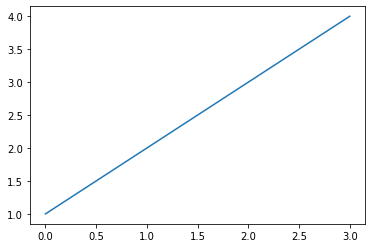

get backend Qt5Agg


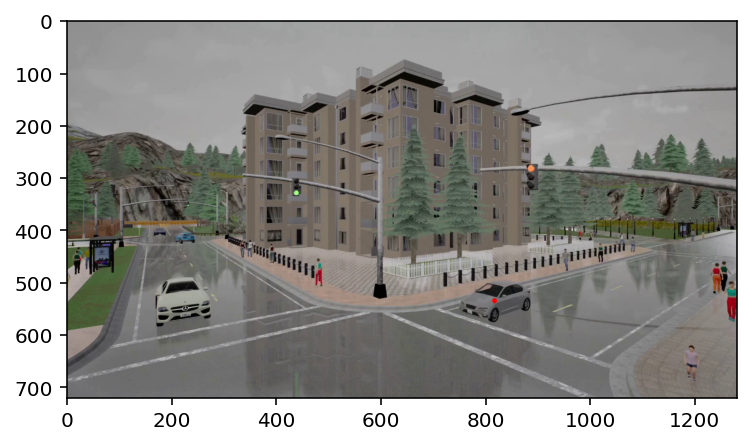

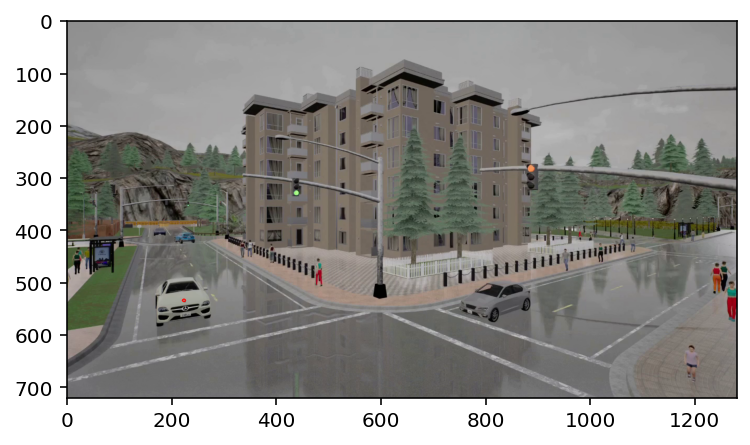

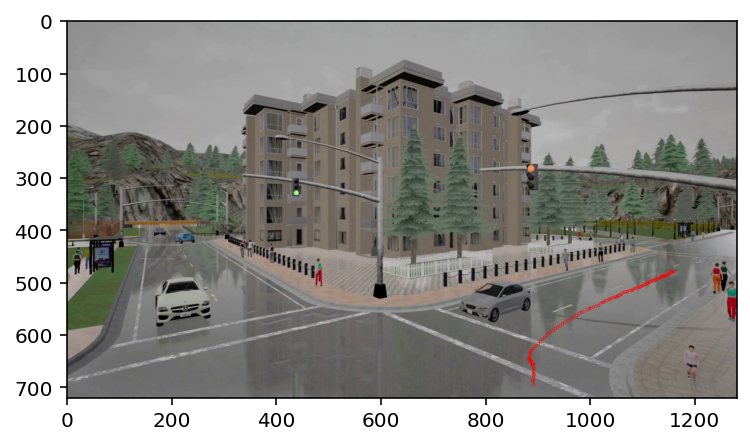

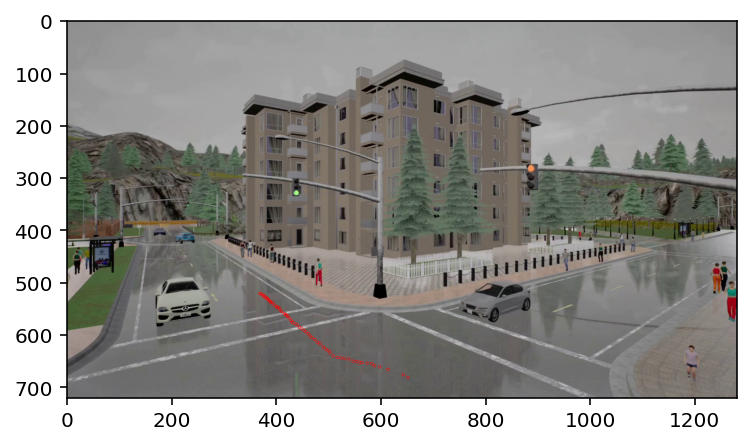

In [13]:
# draw overlay
%matplotlib inline
import matplotlib.pyplot as plt

traffic_world.overlay_trajectory(cam_id, trajectory)

In [ ]:
# render tracking video
filtered_world.get_video([cam_id])

In [9]:
times = filtered_world.get_time()
print("Times are:", times)

Times are: [(datetime.datetime(2021, 6, 8, 7, 10, 30, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 31, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 32, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 33, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 34, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 35, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 36, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 37, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 38, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 39, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 40, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 41, tzinfo=datetime.timezone.utc),), (datetime.datetime(2021, 6, 8, 7, 10, 42, tzinfo=datetime.timezone.utc),), (datetime.dat

In [10]:
geos = filtered_world.get_bbox_geo()
print("Bbox geos are:",geos)

Bbox geos are: [(2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.3896888485676846, 2.7472250308939685, 1.0), (2.0351596988934304, 2.400814869380193, 1.0, 2.392395177954511, 2.7472250308939

In [ ]:
print("Trajectory distances are:")
print(filtered_world.get_distance(0, 30))

In [ ]:
print("Trajectory speeds are:")
print(filtered_world.get_speed(0, 30))